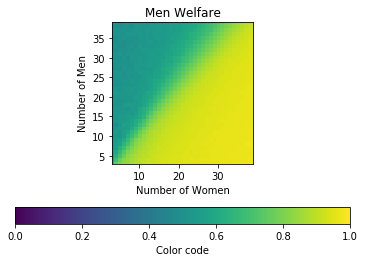

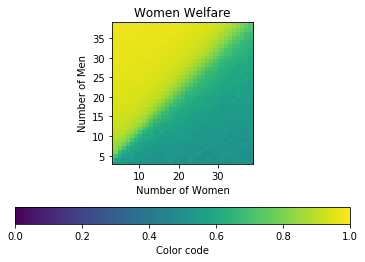

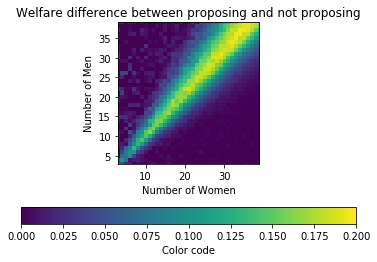

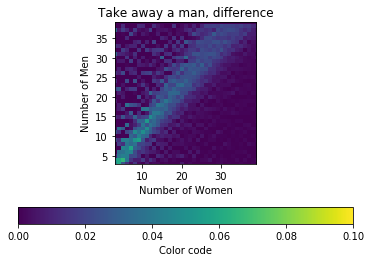

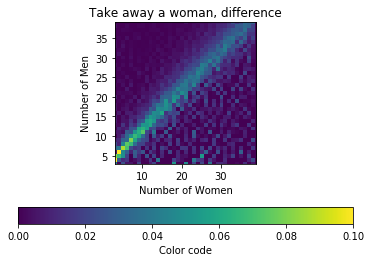

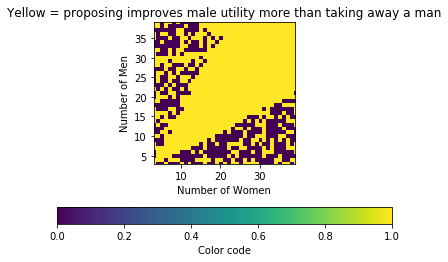

In [4]:
import numpy as np
import math
import random
import copy
from pandas import *
from matplotlib import pyplot as plt

def generate_values(number_men, number_women):

    men_values = [[random.uniform(0,1) for i in range(number_women)] for j in range(number_men)]
    women_values = [[random.uniform(0,1) for i in range(number_men)] for j in range(number_women)]

    return men_values, women_values

def deferred_acceptance(copy_men_values, women_values):
    
    men_values = copy_men_values
    matches = {}
    for i in range(len(women_values)):
        matches[i] = []
    iter=0
    while iter < len(men_values):
        men_temp_max_choices = [-1 for i in range(len(men_values))]
        women_temp_max_choices = [-1 for i in range(len(women_values))]
        for i in range(len(men_values)):
            temp_max_value = -1
            for j in range(len(men_values[0])):
                if men_values[i][j] > temp_max_value:
                    temp_max_value = men_values[i][j]
                    men_temp_max_choices[i] = j
            matches[men_temp_max_choices[i]].append(i)

        for key, value in matches.items():
            temp_value = -1
            for i in range(len(value)):
                if women_values[key][value[i]] > temp_value:
                    temp_value = women_values[key][value[i]]
                    women_temp_max_choices[key] = value[i]

        stable_matches ={}
        for i in range(len(women_temp_max_choices)):
            stable_matches[i] = [women_temp_max_choices[i]]


        for i in range(len(stable_matches)):
            for j in range(len(matches[i])):
                if matches[i][j] not in stable_matches[i]:
                    men_values[matches[i][j]][i] =0
        iter+=1
    return stable_matches

def average_men_value(stable_matches, men_values):
    sum_values = 0
    count=0
    for key in stable_matches:
        if stable_matches[key][0] != -1:
            sum_values+=men_values[stable_matches[key][0]][key]
            count+=1
    return sum_values / count
        
def average_women_value(stable_matches, women_values):
    sum_values = 0
    count=0
    for key in stable_matches:
        if stable_matches[key][0] != -1:
            sum_values+=women_values[key][stable_matches[key][0]]
            count+=1
    return sum_values / count

def propose_diff(men_welfare, women_welfare):
    proposals = [[0 for i in range(len(men_welfare))] for j in range(len(men_welfare[0]))]
    for i in range(len(men_welfare)):
        for j in range(len(men_welfare[0])):
            proposals[i][j] = men_welfare[i][j] - women_welfare[j][i]
    return proposals

def take_away_man(men_welfare):
#     from man's perspective
    differences_men = [[0 for i in range(len(men_welfare))] for j in range(len(men_welfare[0]))]
    for i in range(len(men_welfare) - 1):
        for j in range(len(men_welfare)):
            differences_men[i][j] = men_welfare[i][j] - men_welfare[i+1][j]
    return differences_men

def take_away_woman(women_welfare):
#     from woman's perspective
    differences_women = [[0 for i in range(len(women_welfare))] for j in range(len(women_welfare[0]))]
    for i in range(len(women_welfare)):
        for j in range(len(women_welfare)-1):
            differences_women[i][j] = women_welfare[i][j] - women_welfare[i][j+1]
    return differences_women

def swap_sides_is_better(proposals, take_away_m):
    booleans = [[0 for i in range(len(proposals))] for j in range(len(proposals[0]))]
    for i in range(len(proposals)):
        for j in range(len(proposals[0])):
            if proposals[i][j] > take_away_m[i][j]: 
                booleans[i][j] = 1
            else:
                booleans[i][j] = 0
    return booleans
    
def main():
    
    number_people = 40
    max_iterations = 120
    
    men_welfare =  [[0 for i in range(number_people)] for j in range(number_people)]
    women_welfare = [[0 for i in range(number_people)] for j in range(number_people)]
    for i in range(3, number_people):
        for j in range(3,number_people):
            
            total_avg_men_value = 0
            total_avg_women_value = 0
            iterations = 0
            
            while iterations < max_iterations:

                men_values, women_values = generate_values(i, j)    
                copy_men_values = copy.deepcopy(men_values)

                stable_matches = deferred_acceptance(copy_men_values, women_values)
                total_avg_men_value += average_men_value(stable_matches, men_values)
                total_avg_women_value += average_women_value(stable_matches, women_values)
                
                iterations+=1

            total_avg_men_value = total_avg_men_value / iterations
            total_avg_women_value = total_avg_women_value / iterations
            
            men_welfare[i][j] = total_avg_men_value
            women_welfare[i][j] = total_avg_women_value
    
    np_data1 = np.array(men_welfare)
    np_data2 = np.array(women_welfare)

    plt.title('Men Welfare')
    plt.xlabel('Number of Women')
    plt.ylabel('Number of Men')
    plt.imshow(np_data1, interpolation='none')
    plt.xlim([3, number_people-1])
    plt.gca().invert_yaxis()
    plt.ylim([3, number_people-1])
    plt.yticks(np.arange(5, 40, 5))
    plt.clim(0, 1)
    plt.colorbar(label="Color code", orientation="horizontal", pad=0.2)
    plt.show()

    plt.title('Women Welfare')
    plt.xlabel('Number of Women')
    plt.ylabel('Number of Men')
    plt.imshow(np_data2, interpolation='none')
    plt.xlim([3, number_people-1])
    plt.gca().invert_yaxis()
    plt.ylim([3, number_people-1])
    plt.yticks(np.arange(5, 40, 5))
    plt.clim(0, 1)
    plt.colorbar(label="Color code", orientation="horizontal", pad=0.2)
    plt.show()
    
#     difference between those who propose and those who don't, in the same market
    propose = propose_diff(men_welfare, women_welfare)
    
    plt.title('Welfare difference between proposing and not proposing')
    plt.xlabel('Number of Women')
    plt.ylabel('Number of Men')
    plt.imshow(propose, interpolation='none')
    plt.xlim([3, number_people-1])
    plt.gca().invert_yaxis()
    plt.ylim([3, number_people-1])
    plt.yticks(np.arange(5, 40, 5))
    plt.clim(0, 0.2)
    plt.colorbar(label="Color code", orientation="horizontal", pad=0.2)
    plt.show()
        
    takeaway_m = take_away_man(men_welfare)
    
    plt.title('Take away a man, difference')
    plt.xlabel('Number of Women')
    plt.ylabel('Number of Men')
    plt.imshow(takeaway_m, interpolation='none')
    plt.xlim([3, number_people-1])
    plt.gca().invert_yaxis()
    plt.ylim([3, number_people-1])
    plt.yticks(np.arange(5, 40, 5))
    plt.clim(0, 0.1)
    plt.colorbar(label="Color code", orientation="horizontal", pad=0.2)
    plt.show()
    
    takeaway_w = take_away_woman(women_welfare)
    
    plt.title('Take away a woman, difference')
    plt.xlabel('Number of Women')
    plt.ylabel('Number of Men')
    plt.imshow(takeaway_w, interpolation='none')
    plt.xlim([3, number_people-1])
    plt.gca().invert_yaxis()
    plt.ylim([3, number_people-1])
    plt.yticks(np.arange(5, 40, 5))
    plt.clim(0, 0.1)
    plt.colorbar(label="Color code", orientation="horizontal", pad=0.2)
    plt.show()

    booleans = swap_sides_is_better(propose, takeaway_m)

    plt.title('Yellow = proposing improves male utility more than taking away a man')
    plt.xlabel('Number of Women')
    plt.ylabel('Number of Men')
    plt.imshow(booleans, interpolation='none')
    plt.xlim([3, number_people-1])
    plt.gca().invert_yaxis()
    plt.ylim([3, number_people-1])
    plt.yticks(np.arange(5, 40, 5))
    plt.colorbar(label="Color code", orientation="horizontal", pad=0.2)
    plt.show()
    
    
#     #  (2) the fractions of preference profiles in which the utility of a man in MPDA minus the 
#     #  utility in WPDA is (i) strictly smaller / (ii) equal / (iii) strictly larger than the
#     #  utility gain from having a fixed other reference man leave the market?

    
main()    
 
